In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score,roc_curve,auc,f1_score
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler

In [11]:
ExploreDf = pd.DataFrame()
ExploreDf = pd.read_csv('Paper33SupData/features_2week_1_all.csv')
print(ExploreDf)


     id     SpeedMean  SpeedVariance  TotalDistance  LocationVariance  \
0   u00  4.021665e-05   7.351331e-07      12.335223         -5.921599   
1   u01  3.726261e-07   1.783295e-12       0.447206        -12.336886   
2   u02  1.459056e-06   1.781221e-10       3.000935         -5.240235   
3   u05  9.244979e-07   4.140170e-11       3.480151         -3.008159   
4   u08  4.915202e-07   1.447804e-12       2.303354         -5.793552   
5   u09  8.196724e-07   1.725046e-11       4.721349         -3.657249   
6   u10  5.473887e-07   7.567248e-12       0.447416        -12.345396   
7   u12  8.992635e-06   1.629466e-09      28.432431          1.384059   
8   u13  9.027260e-07   3.891506e-11       1.493131         -7.123582   
9   u14  7.798984e-07   4.053273e-11       0.523751        -12.817784   
10  u16  4.946600e-07   7.688164e-12       0.748345        -10.235398   
11  u17  5.614021e-07   2.161137e-11       0.316402        -12.520971   
12  u18  3.215280e-07   9.839338e-13       0.343521

In [12]:
print(ExploreDf.keys())

Index(['id', 'SpeedMean', 'SpeedVariance', 'TotalDistance', 'LocationVariance',
       'CircadianMovement', 'NumberofClusters', 'Entropy', 'NormalizedEntropy',
       'ContinuousEntropy', 'HomeStay', 'TransitionTime'],
      dtype='object')


In [13]:
PHQ9Df = pd.DataFrame()
PHQ9Df = pd.read_csv('Paper33SupData/phq9_followup.csv')
print(PHQ9Df)

     id  PHQ9
0   u00     3
1   u01     4
2   u02     5
3   u03     4
4   u04     8
5   u05     0
6   u07     8
7   u09     2
8   u10     4
9   u14     3
10  u15     1
11  u16    12
12  u17    18
13  u18    12
14  u19     4
15  u20     8
16  u23    21
17  u24     7
18  u27     7
19  u30     0
20  u31     5
21  u32     2
22  u33    25
23  u34     6
24  u35     7
25  u36     1
26  u42     0
27  u43     4
28  u44     2
29  u45     2
30  u47     1
31  u49     8
32  u51     0
33  u52    15
34  u53    11
35  u56     3
36  u58     8
37  u59     7


In [14]:
print(PHQ9Df.keys())

Index(['id', 'PHQ9'], dtype='object')


In [15]:
PHQ9BaseDf = pd.DataFrame()
PHQ9BaseDf = pd.read_csv('Paper33SupData/phq9_baseline.csv')
PHQ9BaseDf.rename(columns={'PHQ9': 'PHQ9Base'}, inplace=True)
print(PHQ9BaseDf)

     id  PHQ9Base
0   u00         2
1   u01         5
2   u02        13
3   u03         2
4   u04         6
5   u05         2
6   u07         7
7   u08         5
8   u09         4
9   u10         0
10  u12         1
11  u13         4
12  u14         1
13  u15         3
14  u16         6
15  u17        13
16  u18        15
17  u19         5
18  u20         8
19  u22         3
20  u23        11
21  u24         5
22  u27         5
23  u30         1
24  u31        12
25  u32         4
26  u33        23
27  u34         3
28  u35         7
29  u36         2
30  u39         3
31  u42         1
32  u43         7
33  u44         1
34  u45         7
35  u46        10
36  u47         5
37  u49         2
38  u50         7
39  u51         1
40  u52        12
41  u53         8
42  u56         2
43  u57         0
44  u58         5
45  u59         5


In [73]:
# merged_df = pd.merge(ExploreDf, PHQ9Df, on='id')
merged_df = pd.merge(ExploreDf, PHQ9BaseDf, on='id')
print(merged_df)


     id     SpeedMean  SpeedVariance  TotalDistance  LocationVariance  \
0   u00  4.021665e-05   7.351331e-07      12.335223         -5.921599   
1   u01  3.726261e-07   1.783295e-12       0.447206        -12.336886   
2   u02  1.459056e-06   1.781221e-10       3.000935         -5.240235   
3   u05  9.244979e-07   4.140170e-11       3.480151         -3.008159   
4   u08  4.915202e-07   1.447804e-12       2.303354         -5.793552   
5   u09  8.196724e-07   1.725046e-11       4.721349         -3.657249   
6   u10  5.473887e-07   7.567248e-12       0.447416        -12.345396   
7   u12  8.992635e-06   1.629466e-09      28.432431          1.384059   
8   u13  9.027260e-07   3.891506e-11       1.493131         -7.123582   
9   u14  7.798984e-07   4.053273e-11       0.523751        -12.817784   
10  u16  4.946600e-07   7.688164e-12       0.748345        -10.235398   
11  u17  5.614021e-07   2.161137e-11       0.316402        -12.520971   
12  u18  3.215280e-07   9.839338e-13       0.343521

In [74]:
merged_df = merged_df.drop(columns=['id'])

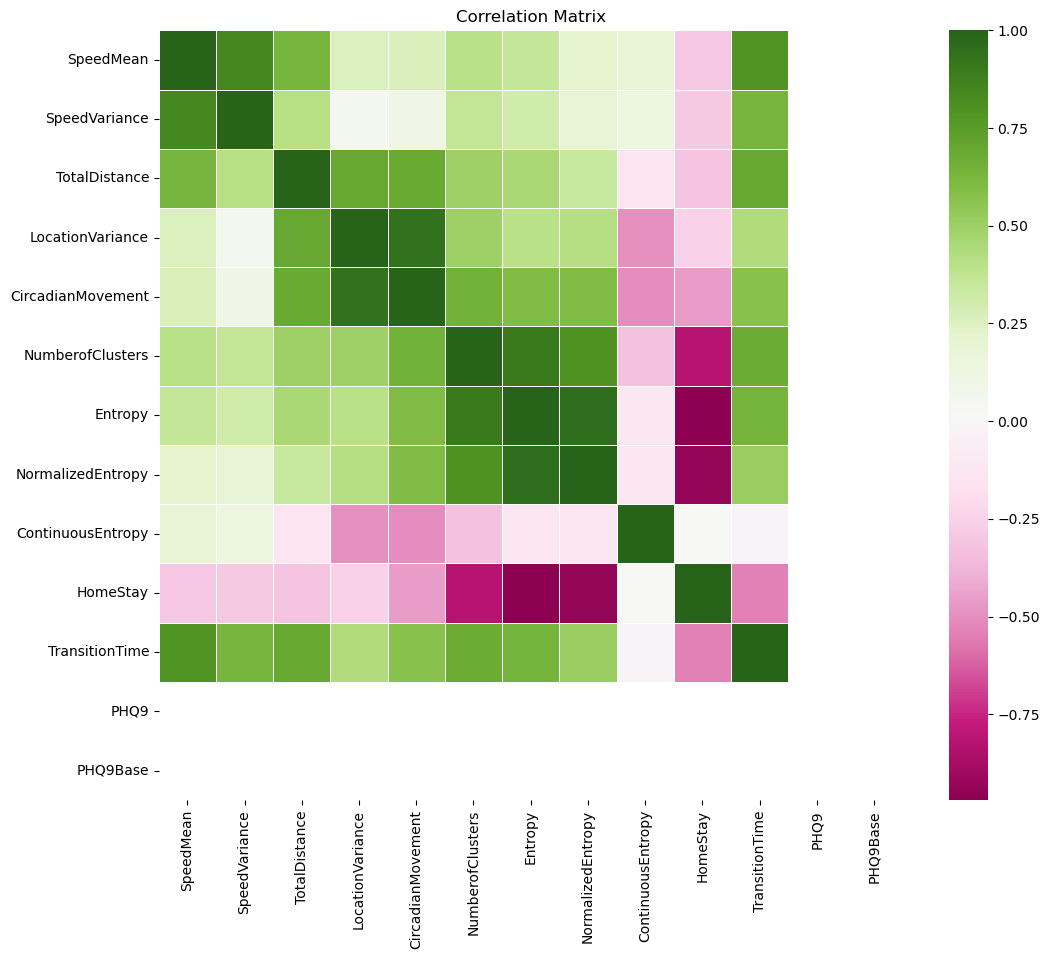

In [23]:
correlation_matrix = merged_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='PiYG', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

plt.show()

# Machine Learning Models:
These are all basic models - no fine tuning or model specific data pre-processing


In [76]:
#creates classes for classification
#creates 3 classes
dataClassificationThree = merged_df.copy()
columns = ['PHQ9Base']
# columns = ['PHQ9']

for column in columns:
    dataClassificationThree.loc[((dataClassificationThree[column] > 0)& (dataClassificationThree[column]<=5)), column] = 0
    dataClassificationThree.loc[((dataClassificationThree[column] > 5)& (dataClassificationThree[column]<=10)), column] = 1
    dataClassificationThree.loc[((dataClassificationThree[column] > 10)), column] = 2

print(dataClassificationThree)


       SpeedMean  SpeedVariance  TotalDistance  LocationVariance  \
0   4.021665e-05   7.351331e-07      12.335223         -5.921599   
1   3.726261e-07   1.783295e-12       0.447206        -12.336886   
2   1.459056e-06   1.781221e-10       3.000935         -5.240235   
3   9.244979e-07   4.140170e-11       3.480151         -3.008159   
4   4.915202e-07   1.447804e-12       2.303354         -5.793552   
5   8.196724e-07   1.725046e-11       4.721349         -3.657249   
6   5.473887e-07   7.567248e-12       0.447416        -12.345396   
7   8.992635e-06   1.629466e-09      28.432431          1.384059   
8   9.027260e-07   3.891506e-11       1.493131         -7.123582   
9   7.798984e-07   4.053273e-11       0.523751        -12.817784   
10  4.946600e-07   7.688164e-12       0.748345        -10.235398   
11  5.614021e-07   2.161137e-11       0.316402        -12.520971   
12  3.215280e-07   9.839338e-13       0.343521        -12.771321   
13  8.036426e-07   5.711299e-11       2.561057  

In [78]:
#creates classes for classification
#creates 2 classes
dataClassification = merged_df.copy()
columns = ['PHQ9Base']
# columns = ['PHQ9']

for column in columns:
    dataClassification.loc[((dataClassification[column] > 0)& (dataClassification[column]<=5)), column] = 0
    dataClassification.loc[((dataClassification[column] > 5)), column] = 1

print(dataClassification)

       SpeedMean  SpeedVariance  TotalDistance  LocationVariance  \
0   4.021665e-05   7.351331e-07      12.335223         -5.921599   
1   3.726261e-07   1.783295e-12       0.447206        -12.336886   
2   1.459056e-06   1.781221e-10       3.000935         -5.240235   
3   9.244979e-07   4.140170e-11       3.480151         -3.008159   
4   4.915202e-07   1.447804e-12       2.303354         -5.793552   
5   8.196724e-07   1.725046e-11       4.721349         -3.657249   
6   5.473887e-07   7.567248e-12       0.447416        -12.345396   
7   8.992635e-06   1.629466e-09      28.432431          1.384059   
8   9.027260e-07   3.891506e-11       1.493131         -7.123582   
9   7.798984e-07   4.053273e-11       0.523751        -12.817784   
10  4.946600e-07   7.688164e-12       0.748345        -10.235398   
11  5.614021e-07   2.161137e-11       0.316402        -12.520971   
12  3.215280e-07   9.839338e-13       0.343521        -12.771321   
13  8.036426e-07   5.711299e-11       2.561057  

In [80]:
# print(dataClassification['PHQ9'].unique())
print(dataClassification['PHQ9Base'].unique())

[0 1]


In [81]:
X = dataClassification.drop(['PHQ9Base'], axis=1)
# X = dataClassification.drop(['PHQ9'], axis=1)
# y_PHQ9 = dataClassification['PHQ9']
y_PHQ9Base = dataClassification['PHQ9Base']


In [28]:
# Create the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    ''' Plot the confusion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)

  
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))

    
    sns.set(font_scale=1.4) 
    sns.heatmap(df_cm, annot=True,fmt='.0f',cmap="YlGnBu",annot_kws={"size": 10}) 
    plt.show()

In [29]:
# ROC Curve
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)
    plt.figure(figsize=(12, 12))
    ax = plt.subplot(121)
    ax.set_aspect(1)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [98]:
#Function to train and evaluate:
def TrainandEval(model, features, target, name):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    print("Train score:", model.score(X_train, y_train))
    print("Validation score:", model.score(X_test, y_test))

    y_pred = model.predict(X_test)
    #print the classification report to highlight the accuracy with f1-score, precision and recall
    print(metrics.classification_report(y_test, y_pred))
    print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    plot_roc_curve(y_test, y_pred)


In [103]:
#declare all model vars:
LR = LogisticRegression()
SVM = SVC()
RF = RandomForestClassifier() 
XGB = XGBClassifier()


## Logistic Regression 

Train score: 0.76
Validation score: 0.5714285714285714
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.00      0.00      0.00         1

    accuracy                           0.57         7
   macro avg       0.40      0.33      0.36         7
weighted avg       0.69      0.57      0.62         7

Number of mislabeled points out of a total 7 points : 3
Accuracy: 0.5714285714285714


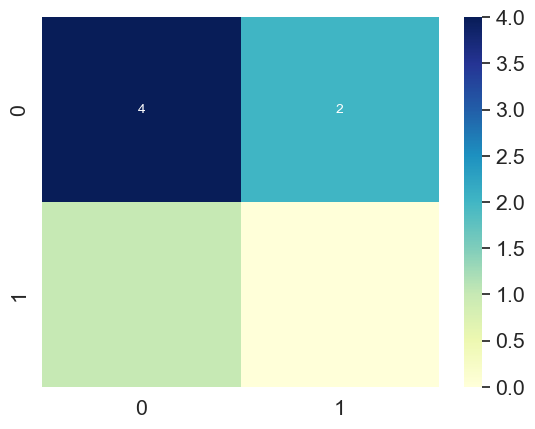

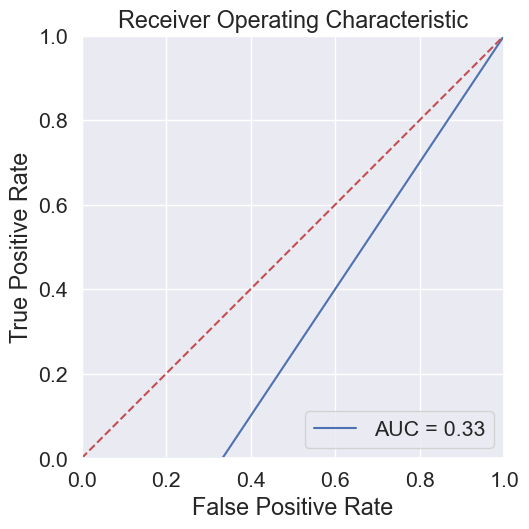

In [104]:
TrainandEval(LR, X, y_PHQ9Base, 'log Reg')

## Support Vector Machine (SVM)

Train score: 0.64
Validation score: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7

Number of mislabeled points out of a total 7 points : 1
Accuracy: 0.8571428571428571


/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

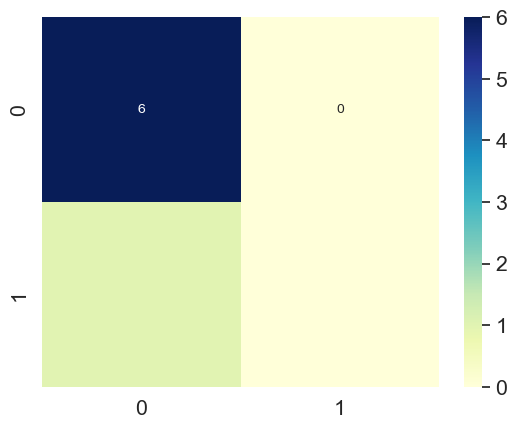

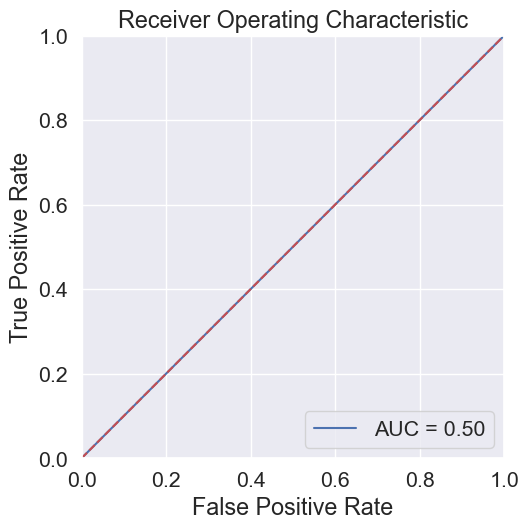

In [110]:
TrainandEval(SVM, X, y_PHQ9Base, 'log Reg')

## Random Forest 

Train score: 1.0
Validation score: 0.5714285714285714
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.00      0.00      0.00         1

    accuracy                           0.57         7
   macro avg       0.40      0.33      0.36         7
weighted avg       0.69      0.57      0.62         7

Number of mislabeled points out of a total 7 points : 3
Accuracy: 0.5714285714285714


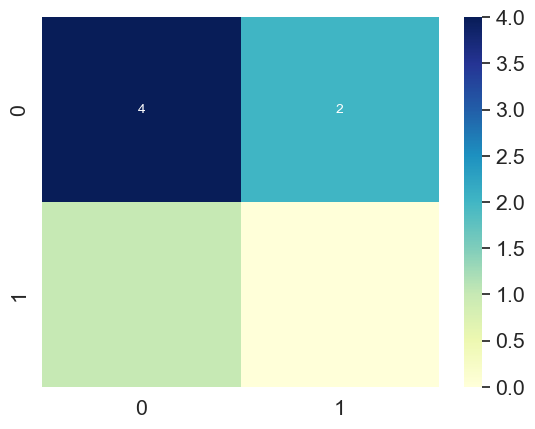

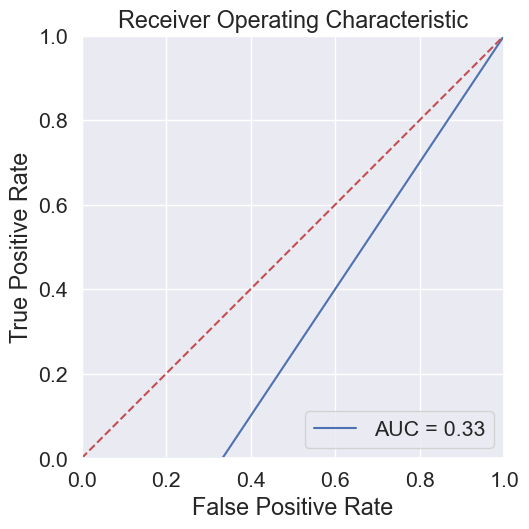

In [106]:
TrainandEval(RF, X, y_PHQ9Base, 'log Reg')

## XGBoost

Train score: 1.0
Validation score: 0.42857142857142855
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.00      0.00      0.00         1

    accuracy                           0.43         7
   macro avg       0.38      0.25      0.30         7
weighted avg       0.64      0.43      0.51         7

Number of mislabeled points out of a total 7 points : 4
Accuracy: 0.42857142857142855


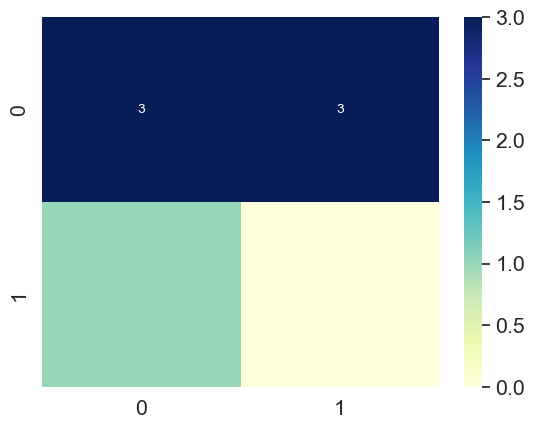

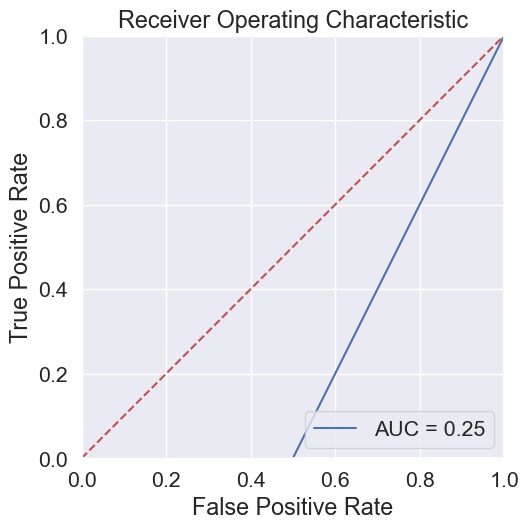

In [107]:
TrainandEval(XGB, X, y_PHQ9Base, 'log Reg')

# Improved ML Models

In [101]:
# Initialize the StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

## SVM

Train score: 0.76
Validation score: 0.5714285714285714
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.00      0.00      0.00         1

    accuracy                           0.57         7
   macro avg       0.40      0.33      0.36         7
weighted avg       0.69      0.57      0.62         7

Number of mislabeled points out of a total 7 points : 3
Accuracy: 0.5714285714285714


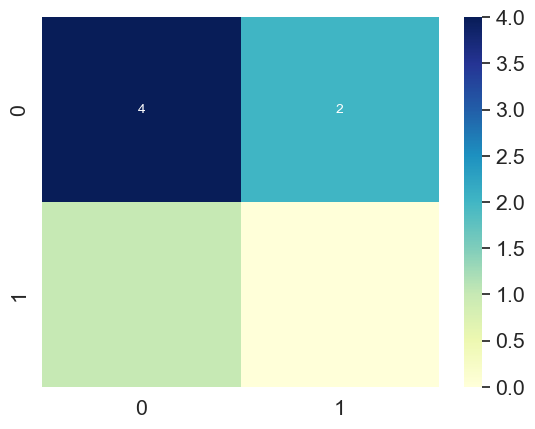

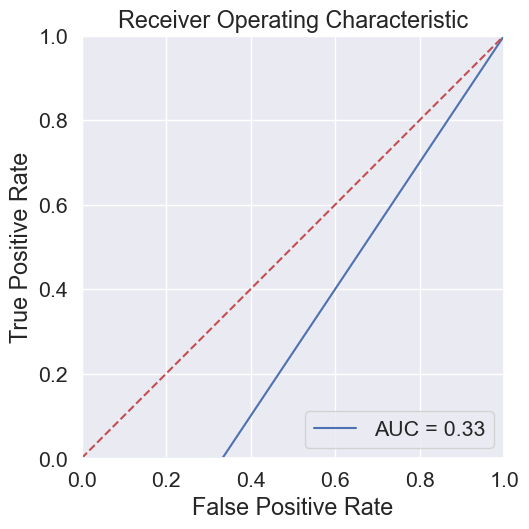

In [108]:
TrainandEval(SVM, X_scaled, y_PHQ9Base, 'log Reg')

## LR

Train score: 0.76
Validation score: 0.5714285714285714
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.00      0.00      0.00         1

    accuracy                           0.57         7
   macro avg       0.40      0.33      0.36         7
weighted avg       0.69      0.57      0.62         7

Number of mislabeled points out of a total 7 points : 3
Accuracy: 0.5714285714285714


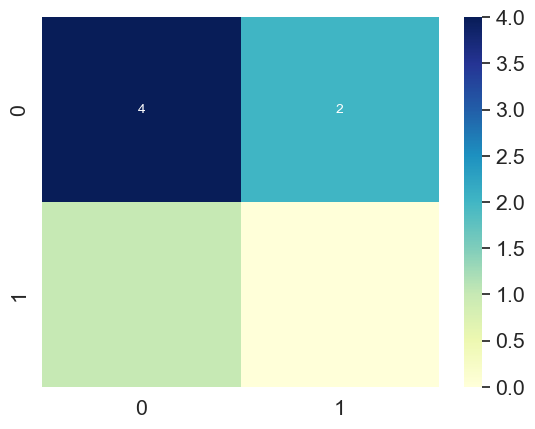

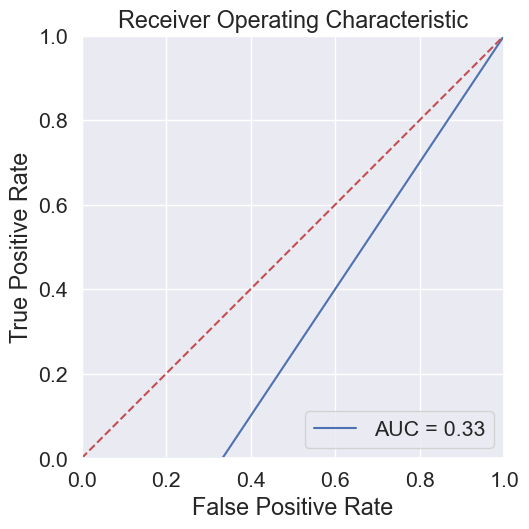

In [109]:
TrainandEval(LR, X_scaled, y_PHQ9Base, 'log Reg')

## Oversampled Data

In [116]:
# Initialize the RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Fit and apply the random oversampling
X_resampled, y_resampled = ros.fit_resample(X, y_PHQ9Base)

In [120]:
print(y_resampled)

print(y_resampled.value_counts())

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    0
14    0
15    0
16    0
17    1
18    1
19    0
20    1
21    0
22    1
23    0
24    0
25    0
26    1
27    1
28    0
29    0
30    0
31    0
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
Name: PHQ9Base, dtype: int64
PHQ9Base
0    22
1    22
Name: count, dtype: int64


Train score: 0.8285714285714286
Validation score: 0.5555555555555556
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.56      1.00      0.71         5

    accuracy                           0.56         9
   macro avg       0.28      0.50      0.36         9
weighted avg       0.31      0.56      0.40         9

Number of mislabeled points out of a total 9 points : 4
Accuracy: 0.5555555555555556


/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

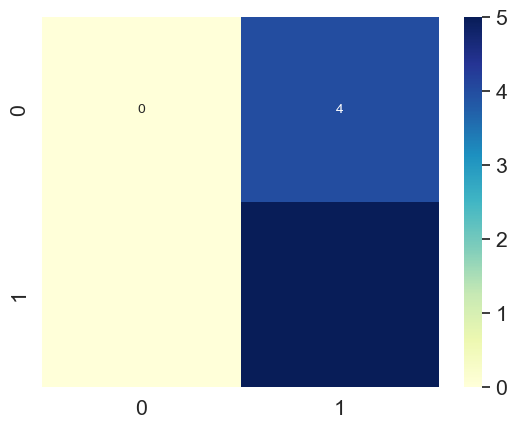

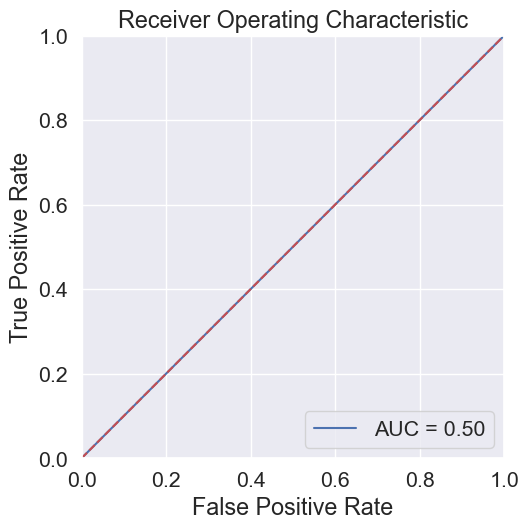

In [113]:
TrainandEval(LR, X_resampled, y_resampled, 'log Reg')